# **Linear Regression**

## *Data Import*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("community_health.csv")

In [3]:
df

,age,gender,race/ethnicity,weight,height,visits
0,47,female,group D,247,65,28
1,26,male,group C,283,66,23
2,26,male,group B,201,68,14
3,39,male,group C,237,73,21
4,55,male,group A,199,61,27
...,...,...,...,...,...,...
995,43,female,group E,273,68,22
996,34,female,group D,247,76,16
997,54,female,group B,310,75,27
998,38,male,group E,64,75,7


## *About Data*

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             1000 non-null   int64 
 1   gender          1000 non-null   object
 2   race/ethnicity  1000 non-null   object
 3   weight          1000 non-null   int64 
 4   height          1000 non-null   int64 
 5   visits          1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1000.0,45.019,14.839166,0.0,36.0,45.0,55.0,89.0
weight,1000.0,199.045,52.815077,45.0,165.0,197.0,236.0,356.0
height,1000.0,67.300,6.285341,46.0,63.0,67.0,72.0,86.0
visits,1000.0,19.956,6.455055,2.0,15.0,20.0,24.0,40.0


In [6]:
df.isna()

,age,gender,race/ethnicity,weight,height,visits
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
995,False,False,False,False,False,False
996,False,False,False,False,False,False
997,False,False,False,False,False,False
998,False,False,False,False,False,False


In [7]:
df.isna().sum()

age               0
gender            0
race/ethnicity    0
weight            0
height            0
visits            0
dtype: int64

## *Data Preparition*

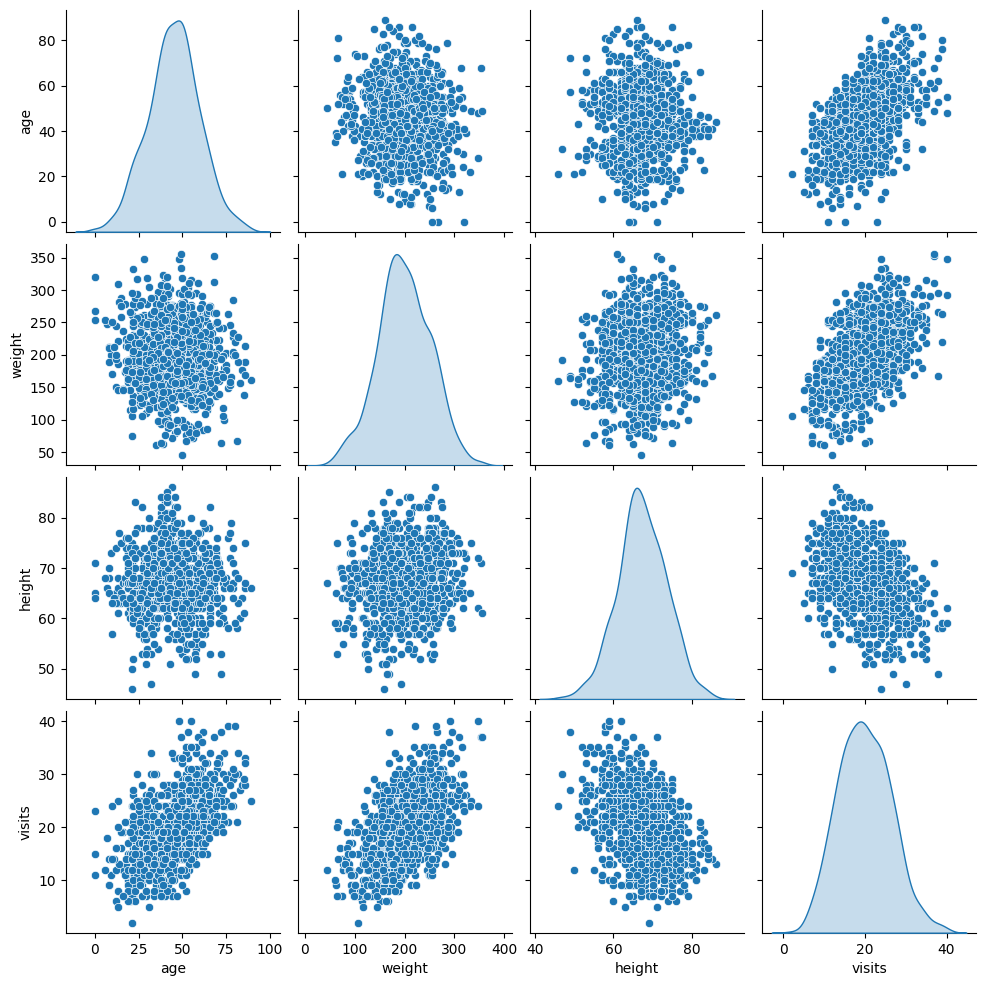

In [8]:
sns.pairplot(df, diag_kind="kde")

## *Train Test Split*

**Relation Between Age and Visits**

In [9]:
X = df[["age"]]
y = df["visits"]

In [10]:
X.head()

,age
0,47
1,26
2,26
3,39
4,55


In [11]:
y.head()

0    28
1    23
2    14
3    21
4    27
Name: visits, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# help(train_test_split)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [15]:
X_train.head()

,age
26,45
155,21
872,47
383,64
648,50


In [16]:
y_train.head()

26     18
155     8
872    18
383    20
648    24
Name: visits, dtype: int64

In [17]:
X_test.head()

,age
890,72
983,47
107,16
609,34
113,50


In [18]:
y_test.head()

890    25
983    20
107    19
609    16
113    29
Name: visits, dtype: int64

## *Scikit Learn*

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
regr = LinearRegression()

In [21]:
regr.fit(X_train, y_train)

LinearRegression()

In [22]:
df["age"].corr(df["visits"])

0.5395427263086969

## *Prediction*

In [23]:
test_pred = regr.predict(X_test)

In [24]:
test_pred

array([26.08962087, 20.36064139, 13.25670684, 17.38157206, 21.04811893,
       14.17334356, 15.54829863, 20.58980057, 20.81895975, 18.98568632,
       12.79838848, 18.0690496 , 20.36064139, 21.50643729, 24.25634743,
       18.98568632, 14.63166192, 22.65223318, 25.17298415, 17.83989042,
       17.38157206, 22.19391482, 19.90232303, 20.36064139, 20.81895975,
       21.04811893, 20.58980057, 16.23577617, 21.50643729, 21.73559647,
       17.83989042, 29.29784937, 17.83989042, 21.73559647, 24.71466579,
       19.44400467, 15.08998027, 20.36064139, 20.36064139, 21.50643729,
       17.15241288, 16.69409453, 27.23541676, 19.90232303, 15.54829863,
       20.36064139, 21.04811893, 11.42343341, 22.19391482, 15.77745781,
       21.50643729, 22.19391482, 21.27727811, 17.15241288, 17.83989042,
       22.88139236, 19.44400467, 18.0690496 , 21.04811893, 14.17334356,
       23.5688699 , 18.52736796, 16.23577617, 25.86046169, 20.13148221,
       18.98568632, 18.98568632, 13.94418438, 16.92325371, 20.58

## *Performance*

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [26]:
print("Theta     : ", round(regr.coef_[0], 2))
print("Intercept : ", round(regr.intercept_, 2))
print("R^2       : ", round(r2_score(y_test, test_pred), 2))
print("MAE       : ", round(mean_absolute_error(y_test, test_pred), 2))
print("RMSE      : ", round(np.sqrt(mean_squared_error(y_test, test_pred)), 2))

Theta     :  0.23
Intercept :  9.59
R^2       :  0.29
MAE       :  4.38
RMSE      :  5.57


In [27]:
df["visits"].mean()

19.956

In [28]:
df["visits"].std()

6.455054742737023

## *Visualization*

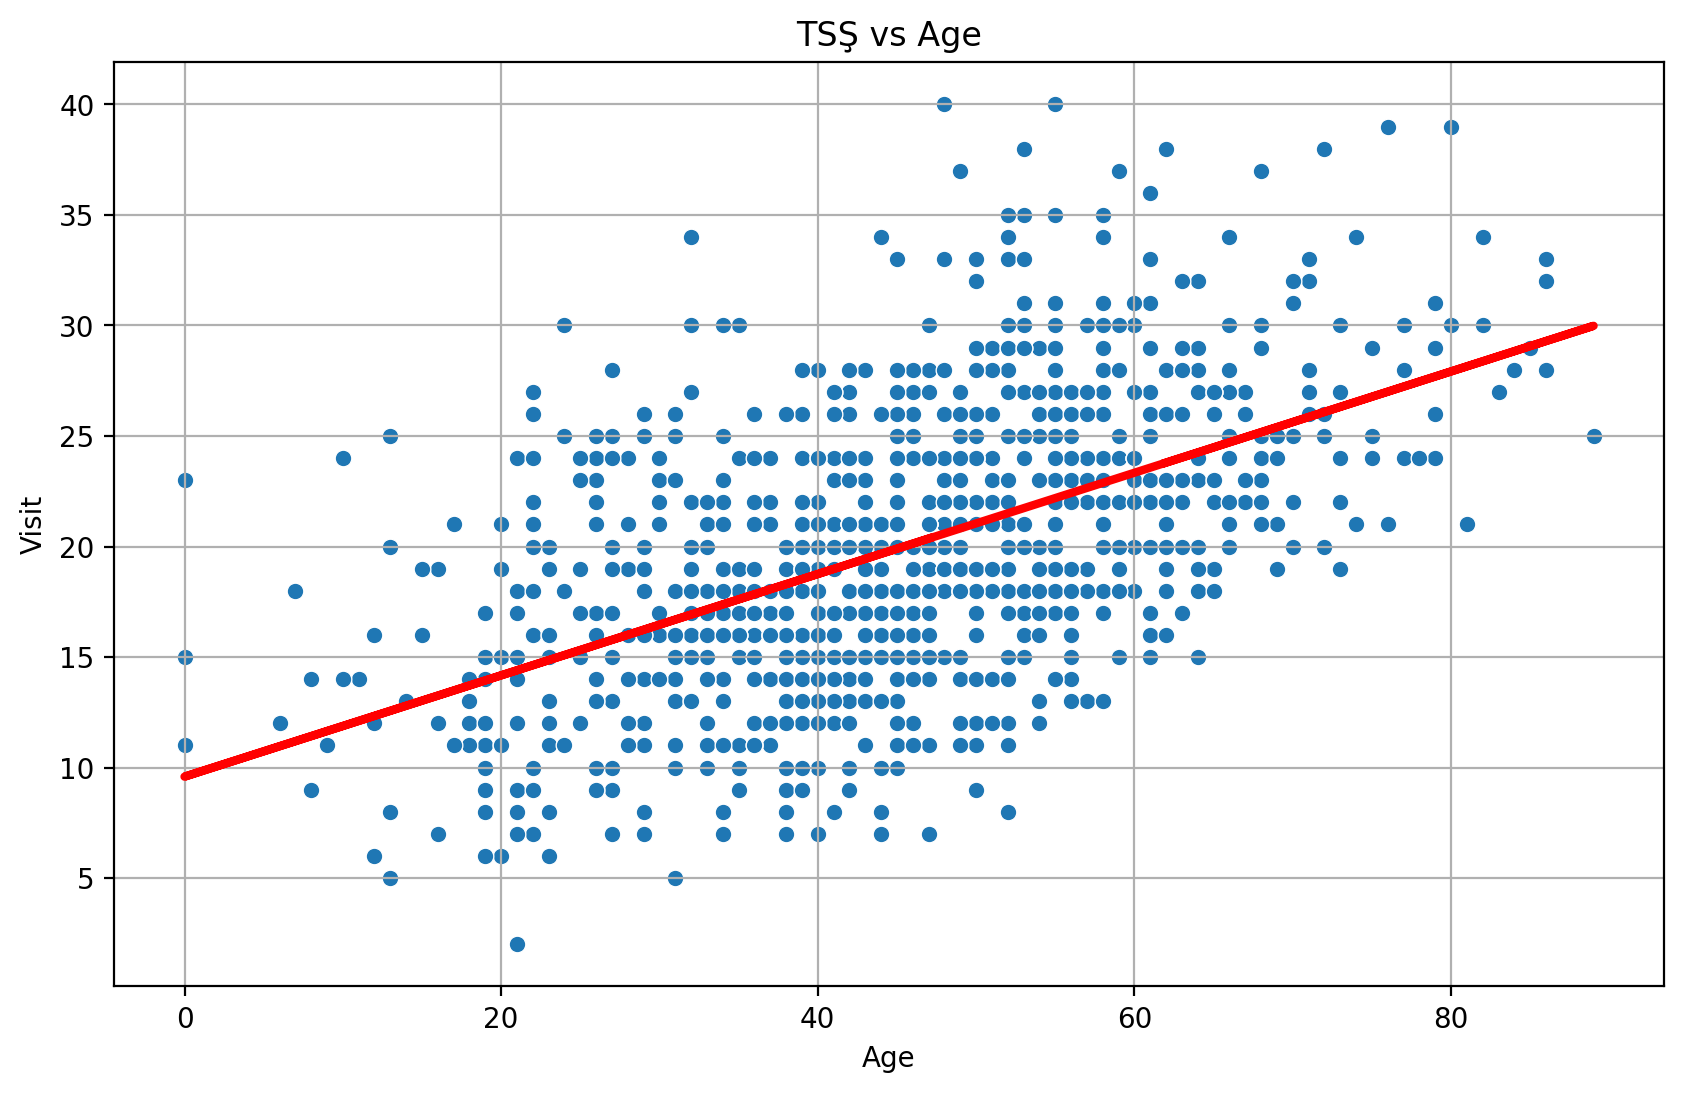

In [29]:
plt.figure(figsize=(10,6), dpi=200)
plt.plot(X, regr.predict(X), color="Red", lw=3)
sns.scatterplot(data=df, x="age", y="visits")
plt.xlabel("Age", size=10)
plt.ylabel("Visit", size=10)
plt.title("TSŞ vs Age", size=12)
plt.grid(True)

**Summary: We cannot make a comment about the number of hospital visits by looking only at age.**